## Random Forest - MOF_photocatalytic activity - 2bins - 50/50

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

In [2]:
def smiles_to_fingerprint(smiles) -> np.ndarray:
    """
    Convert a SMILES string to a molecular fingerprint using RDKit.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # generate Morgan fingerprint
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=20, fpSize=512)
    fingerprint = mfpgen.GetFingerprint(mol)

    return np.array(fingerprint)

In [3]:
df = pd.read_csv(f"../PhotocatCO2conversionMOFs_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   catalyst_name             77 non-null     object 
 1   linker_name               77 non-null     object 
 2   cocatalyst                11 non-null     object 
 3   SMILES                    77 non-null     object 
 4   source_for_metal          77 non-null     object 
 5   band_gap_for_composite    21 non-null     object 
 6   band_gap_for_MOF          29 non-null     object 
 7   band_gap_for_cocatalyst   9 non-null      float64
 8   CB_for_MOF                25 non-null     object 
 9   CB_for_cocatalyst         9 non-null      float64
 10  VB_for_MOF                25 non-null     object 
 11  VB_for_cocatalyst         9 non-null      float64
 12  light_source              77 non-null     object 
 13  sacrificial_agent         77 non-null     object 
 14  reaction_pha

In [4]:
df["mp_bin"] = df["SMILES"].apply(smiles_to_fingerprint)
df["mp_bin"]

0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
72    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
73    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
74    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
75    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
76    [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...
Name: mp_bin, Length: 77, dtype: object

In [5]:
print(len(df["product"].unique()))
df["product"].unique()

8


array(['CH3COOH', 'MeOH', 'H2', 'CO', 'CH4', 'HCOOC', 'HCOO', 'COOH'],
      dtype=object)

In [6]:
encoder_product = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_product = encoder_product.fit_transform(df[["product"]])
df = pd.concat([df, one_hot_product], axis=1)

In [7]:
print(len(df["source_for_metal"].unique()))
df["source_for_metal"].unique()

43


array(['ZrCl4', 'ZnO/Pt', 'In(NO3)3·xH2O', 'titanium isopropoxide',
       'Co(NO3)2·6H2O', 'CoCl2∙6H2O', 'In(NO3)3·xH2O and Fe(NO3)3',
       'ZrOCl2·8H2O', 'Re(CO)5Cl', 'zinc acetate hexahydrate',
       'Zn(NO3)2·6H2O', 'zirconium (IV) chloride', 'isopropyl titanate',
       'Titanium(IV) ethoxide', 'Co(NO3)2·H2O', 'Co(NO3)2•6H2O', 'Cu2O',
       'ZrCl4 and tetrapropylorthortitanate', 'Co(CH3CHO)2·6H2O',
       'Zn(NO3)2·6H2O and Ni(NO3)2·6H2O', 'copper nitrate trihydrate',
       'Mg(NO3)2·6H2O', 'Zirconium tetrachloride',
       'Ru(4,4′-H2dcbpy)2Cl2 and Cd(ClO4)2·6H2O', 'Ni(NO3)2·6H2O',
       'Ni(NO3)2·6H2O, ZrCl4, and Cu(NO3)2·3H2O',
       'Ni(phen)(oba)]n·0.5nH2O', 'titanium tetrachloride',
       'Ce(NO3)3·6H2O', 'FeCl3·6H2O', 'Cu(NO3)2·6H2O', 'Cr(NO3)3·9H2O',
       'Co(NO3)2 · 6H2O', 'Ni(ClO4)2·6H2O', 'zinc nitrate hexahydrate',
       'Zn(NO3)2', 'tetra-n-butyl titanate', '9 RuCl3·3H2O/ ZrOCl2·H2O',
       'Ir2(ppy)4Cl2', 'RhCl3 / ZrCl4', 'Fe2Zn', 'ZrCl5',
       'Co(CH3C

In [8]:
encoder_source = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_source = encoder_source.fit_transform(df[["source_for_metal"]])
df = pd.concat([df, one_hot_source], axis=1)

In [9]:
print(len(df["linker_name"].unique()))
df["linker_name"].unique()

33


array(['1,4-benzenedicarboxylic acid (H2BDC)', '2-methylimidazole',
       '2-aminoterephthalic acid',
       '4,5-dicarboxyimidazole and 4,4’- bipyridine', 'TCPP',
       'Benzene-1,3,5-tricarboxylic acid (H3BTC)',
       '2′-amino-[1,1′:4′,1″-terphenyl]-3,3″,5,5″- tetracarboxylic acid (H4L)',
       '2,2′-bipyridine', '2-Methylimidazole', 'terephthalic acid',
       'N,N-Cetyl Tri-methyl Ammonium Bromide', 'benzimidazole',
       '1,3,5-benzenetricarboxylic acid',
       '4,4′-(anthracene-9,10-diylbis(ethyne-2,1-diyl))dibenzoic acid',
       '4,4′,4′′-nitrilotribenzoic acid and 4,4′-bipyridine',
       "4,4'-(porphyrin-5,15-diyl)dibenzoic acid",
       '1.2‐aminoterephtalic acid',
       '2, 5-dioxido-1,4-benzenedicarboxylate',
       'phen = 1,10-phenanthroline, oba = 4,4′-oxybis(benzoate)',
       'Dicyandiamide',
       '2,4,6-tris (2-(pyridin-4-yl)vinyl)-1,3,5-triazine and 1,3,5-benzenetricarboxylic acid',
       '1,3,5-Benzenetricarboxylic acid',
       '4,4′,4″-nitrilotribenzoi

In [10]:
encoder_linker = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_linker = encoder_linker.fit_transform(df[["linker_name"]])
df = pd.concat([df, one_hot_linker], axis=1)

In [11]:
print(len(df["reaction_phase"].unique()))
df["reaction_phase"].unique()

5


array(['L', 'G', 'g', 'l', 'N'], dtype=object)

In [12]:
encoder_phase = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_phase = encoder_phase.fit_transform(df[["reaction_phase"]])
df = pd.concat([df, one_hot_phase], axis=1)

In [13]:
print(len(df["sacrificial_agent"].unique()))
df["sacrificial_agent"].unique()

30


array(['H2O+CO2', 'H2O+CO2 (Co(bpy)3)2', 'H2O+CO2 (Ru-(bpy)3)2',
       'Prophyrin', 'BNAH and TEOA, (Ru(bpy)3)2+',
       'TEOA, BNAH,(Ru(bpy)3)2+', '(bpy)3', 'TEOA',
       'acetonitrile and TEOA', 'ethyl acetate or acetonitrile,H2O+CO2',
       'MeCN and TEOA', 'MeCN and triethanolamine',
       '[Ru(bpy)3]Cl2·6H2O , acetonitrile and TEOA and H2O+CO2',
       'acetonitrile and H2O+CO2',
       'acetonitrile, TEOA, H2O, CoCl2·6H2O, and bipyridine+CO2',
       'Aceton, TEOA, CO2', '[Ru(bpy)3]Cl2.6H2O and TIPA, H2O and CO2',
       '[Ru(bpy)3]Cl2.6H2O and TIPA, H2O and CO3',
       '[Ru(bpy)3]Cl2.6H2O and TIPA, H2O and CO4', 'TEOA, Aceton +CO2',
       'MeCN/TEOA/H2O and [Ru(bpy)3]Cl2 · 6H2O',
       '[Ru(bpy)3]Cl2·6H2O +CO2', 'TEOA or DMA, DMF and H2O +CO2',
       'H2O +CO2', 'MeCN/MeOH/TEOA +cO2', 'H2O + CO2', 'MeCN/TEOA',
       'TIPA', 'TEOA/H2O', 'TEOA/H2O/MeCN and [Ru(bpy)3]Cl2·6H2O'],
      dtype=object)

In [14]:
encoder_agent = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_agent = encoder_agent.fit_transform(df[["sacrificial_agent"]])
df = pd.concat([df, one_hot_agent], axis=1)

In [15]:
print(len(df["cocatalyst"].unique()))
df["cocatalyst"].unique()

8


array(['MoS2', 'Cd2Zn8S', nan, 'ZnO/rGO', 'CdS', 'g-C3N4', 'TiO2', 'Ag'],
      dtype=object)

In [16]:
encoder_cocatalyst = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_cocatalyst = encoder_cocatalyst.fit_transform(df[["cocatalyst"]])
df = pd.concat([df, one_hot_cocatalyst], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 153 entries, catalyst_name to cocatalyst_nan
dtypes: float64(131), int64(3), object(19)
memory usage: 92.2+ KB


In [27]:
list(df.iloc[:,25:153].columns)

['mp_bin',
 'product_CH3COOH',
 'product_CH4',
 'product_CO',
 'product_COOH',
 'product_H2',
 'product_HCOO',
 'product_HCOOC',
 'product_MeOH',
 'source_for_metal_9 RuCl3·3H2O/ ZrOCl2·H2O',
 'source_for_metal_Ce(NO3)3·6H2O',
 'source_for_metal_Co(CH3CHO)2·6H2O',
 'source_for_metal_Co(CH3COO)2·6H2O',
 'source_for_metal_Co(NO3)2 · 6H2O',
 'source_for_metal_Co(NO3)2·6H2O',
 'source_for_metal_Co(NO3)2·H2O',
 'source_for_metal_Co(NO3)2•6H2O',
 'source_for_metal_CoCl2∙6H2O',
 'source_for_metal_Cr(NO3)3·9H2O',
 'source_for_metal_Cu(NO3)2·6H2O',
 'source_for_metal_Cu2O',
 'source_for_metal_Fe2Zn',
 'source_for_metal_FeCl3·6H2O',
 'source_for_metal_In(NO3)3·xH2O',
 'source_for_metal_In(NO3)3·xH2O and Fe(NO3)3',
 'source_for_metal_Ir2(ppy)4Cl2',
 'source_for_metal_Mg(NO3)2·6H2O',
 'source_for_metal_Ni(ClO4)2·6H2O',
 'source_for_metal_Ni(NO3)2·6H2O',
 'source_for_metal_Ni(NO3)2·6H2O, ZrCl4, and Cu(NO3)2·3H2O',
 'source_for_metal_Ni(phen)(oba)]n·0.5nH2O',
 'source_for_metal_Re(CO)5Cl',
 'source_

In [40]:
def prepare_dataset_classification(
    df,
    target = "activity_2bins_5050",
    representation = list(df.iloc[:,25:153].columns),
    random_state=42,
    train_size=65
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    X_train_concatenate = X_train.iloc[[i for i in np.arange(len(X_train))],:].apply(
        lambda row: np.hstack(row), axis=1
    )
    
    X_test_concatenate = X_test.iloc[[i for i in np.arange(len(X_test))],:].apply(
        lambda row: np.hstack(row), axis=1
    )
    
    return list(X_train_concatenate), y_train, list(X_test_concatenate), y_test

In [41]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=200, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [42]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 15

In [43]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [44]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 62
random_state = 42
Accuracy: 0.5161290322580645
F1 macro: 0.4816053511705686
F1 micro: 0.5161290322580645
F1 weighted: 0.4816053511705686
Kappa: 0.032258064516129004
-------------Iteration 2/10
15 62
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5483870967741935
F1 macro: 0.5464994775339603
F1 micro: 0.5483870967741935
F1 weighted: 0.5464994775339603
Kappa: 0.09677419354838712
-------------Iteration 3/10
15 62
random_state = 44
Accuracy: 0.5161290322580645
F1 macro: 0.4816053511705686
F1 micro: 0.5161290322580645
F1 weighted: 0.4816053511705686
Kappa: 0.032258064516129004
-------------Iteration 4/10
15 62
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.43548387096774194
F1 macro: 0.43415906127770537
F1 micro: 0.43548387096774194
F1 weighted: 0.43415906127770537
Kappa: -0.12903225806451624
-------------Iteration 5/10
15 62
random_state = 46
Accuracy: 0.5806451612903226
F1 macro: 0.5788923719958203
F1 micro: 0.5806451612903226
F1 weighted: 0.5788923719958203
Kappa: 0.16129032258064513
-------------Iteration 6/10
15 62
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6129032258064516
F1 macro: 0.6025641025641025
F1 micro: 0.6129032258064516
F1 weighted: 0.6025641025641024
Kappa: 0.22580645161290325
-------------Iteration 7/10
15 62
random_state = 48
Accuracy: 0.6290322580645161
F1 macro: 0.5988748241912799
F1 micro: 0.6290322580645161
F1 weighted: 0.5988748241912799
Kappa: 0.25806451612903225
-------------Iteration 8/10
15 62
random_state = 49


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.4689140646587455
F1 micro: 0.5
F1 weighted: 0.46891406465874547
Kappa: 0.0
-------------Iteration 9/10
15 62
random_state = 50
Accuracy: 0.5161290322580645
F1 macro: 0.5141065830721003
F1 micro: 0.5161290322580645
F1 weighted: 0.5141065830721002
Kappa: 0.032258064516129004
-------------Iteration 10/10
15 62
random_state = 51


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.45161290322580644
F1 macro: 0.4510416666666667
F1 micro: 0.45161290322580644
F1 weighted: 0.4510416666666667
Kappa: -0.09677419354838701


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [45]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.5306451612903225 +/- 0.06011175855994911
mean F1 macro: 0.5158262854301519 +/- 0.0589500852809101
mean F1 micro: 0.5306451612903225 +/- 0.06011175855994911
mean F1 weighted: 0.5158262854301519 +/- 0.058950085280910086
mean Kappa: 0.06129032258064515 +/- 0.12022351711989823


In [46]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.516129,0.481605,0.516129,0.481605,0.032258
1,15,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",0.548387,0.546499,0.548387,0.546499,0.096774
2,15,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0.516129,0.481605,0.516129,0.481605,0.032258


### training size = 25

In [47]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [48]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 52
random_state = 42
Accuracy: 0.5384615384615384
F1 macro: 0.4756302521008403
F1 micro: 0.5384615384615384
F1 weighted: 0.47563025210084037
Kappa: 0.07692307692307687
-------------Iteration 2/10
25 52
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5384615384615384
F1 macro: 0.5377777777777778
F1 micro: 0.5384615384615384
F1 weighted: 0.5377777777777778
Kappa: 0.07692307692307687
-------------Iteration 3/10
25 52
random_state = 44
Accuracy: 0.4230769230769231
F1 macro: 0.41964285714285715
F1 micro: 0.4230769230769231
F1 weighted: 0.4196428571428571
Kappa: -0.15384615384615374
-------------Iteration 4/10
25 52
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.5769230769230769
F1 macro: 0.5606758832565284
F1 micro: 0.5769230769230769
F1 weighted: 0.5606758832565284
Kappa: 0.15384615384615385
-------------Iteration 5/10
25 52
random_state = 46
Accuracy: 0.5961538461538461
F1 macro: 0.5960044395116537
F1 micro: 0.5961538461538461
F1 weighted: 0.5960044395116537
Kappa: 0.1923076923076923
-------------Iteration 6/10
25 52
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5576923076923077
F1 macro: 0.5535647629712579
F1 micro: 0.5576923076923077
F1 weighted: 0.5535647629712579
Kappa: 0.11538461538461542
-------------Iteration 7/10
25 52
random_state = 48
Accuracy: 0.46153846153846156
F1 macro: 0.45427286356821595
F1 micro: 0.46153846153846156
F1 weighted: 0.4542728635682159
Kappa: -0.07692307692307687
-------------Iteration 8/10
25 52
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.4932533733133433
F1 micro: 0.5
F1 weighted: 0.49325337331334335
Kappa: 0.0
-------------Iteration 9/10
25 52
random_state = 50
Accuracy: 0.5
F1 macro: 0.49925925925925924
F1 micro: 0.5
F1 weighted: 0.49925925925925924
Kappa: 0.0
-------------Iteration 10/10
25 52
random_state = 51
Accuracy: 0.5576923076923077
F1 macro: 0.5535647629712579
F1 micro: 0.5576923076923077
F1 weighted: 0.5535647629712579
Kappa: 0.11538461538461542


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [49]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.5249999999999999 +/- 0.050916162672591254
mean F1 macro: 0.5143646231872993 +/- 0.05214279535613134
mean F1 micro: 0.5249999999999999 +/- 0.050916162672591254
mean F1 weighted: 0.5143646231872993 +/- 0.05214279535613134
mean Kappa: 0.05000000000000001 +/- 0.10183232534518248


In [50]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...",0.538462,0.475630,0.538462,0.475630,0.076923
1,25,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ...",0.538462,0.537778,0.538462,0.537778,0.076923
2,25,"[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.423077,0.419643,0.423077,0.419643,-0.153846


### training size = 35

In [51]:
train_size = 35
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [52]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
35 42
random_state = 42
Accuracy: 0.5714285714285714
F1 macro: 0.5552941176470588
F1 micro: 0.5714285714285714
F1 weighted: 0.5552941176470588
Kappa: 0.1428571428571429
-------------Iteration 2/10
35 42
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5238095238095238
F1 macro: 0.5194508009153318
F1 micro: 0.5238095238095238
F1 weighted: 0.5194508009153318
Kappa: 0.04761904761904767
-------------Iteration 3/10
35 42
random_state = 44
Accuracy: 0.5476190476190477
F1 macro: 0.5411155836687751
F1 micro: 0.5476190476190477
F1 weighted: 0.5411155836687752
Kappa: 0.09523809523809523
-------------Iteration 4/10
35 42
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6666666666666666
F1 macro: 0.6541176470588235
F1 micro: 0.6666666666666666
F1 weighted: 0.6541176470588235
Kappa: 0.33333333333333337
-------------Iteration 5/10
35 42
random_state = 46
Accuracy: 0.6666666666666666
F1 macro: 0.6666666666666666
F1 micro: 0.6666666666666666
F1 weighted: 0.6666666666666666
Kappa: 0.33333333333333337
-------------Iteration 6/10
35 42
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.49743589743589745
F1 micro: 0.5
F1 weighted: 0.49743589743589745
Kappa: 0.0
-------------Iteration 7/10
35 42
random_state = 48
Accuracy: 0.6190476190476191
F1 macro: 0.6047058823529412
F1 micro: 0.6190476190476191
F1 weighted: 0.6047058823529412
Kappa: 0.23809523809523814
-------------Iteration 8/10
35 42
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.4523809523809524
F1 macro: 0.44957264957264953
F1 micro: 0.4523809523809524
F1 weighted: 0.4495726495726495
Kappa: -0.09523809523809534
-------------Iteration 9/10
35 42
random_state = 50
Accuracy: 0.6190476190476191
F1 macro: 0.6155606407322655
F1 micro: 0.6190476190476191
F1 weighted: 0.6155606407322655
Kappa: 0.23809523809523814
-------------Iteration 10/10
35 42
random_state = 51
Accuracy: 0.6190476190476191
F1 macro: 0.6111111111111112
F1 micro: 0.6190476190476191
F1 weighted: 0.6111111111111112
Kappa: 0.23809523809523814


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [53]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.5785714285714285 +/- 0.06822166086616381
mean F1 macro: 0.571503099716152 +/- 0.06688954577269314
mean F1 micro: 0.5785714285714285 +/- 0.06822166086616381
mean F1 weighted: 0.571503099716152 +/- 0.06688954577269315
mean Kappa: 0.15714285714285717 +/- 0.13644332173232768


In [54]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...",0.571429,0.555294,0.571429,0.555294,0.142857
1,35,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.523810,0.519451,0.523810,0.519451,0.047619
2,35,"[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.547619,0.541116,0.547619,0.541116,0.095238


### training size = 45

In [55]:
train_size = 45
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [56]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 32
random_state = 42
Accuracy: 0.625
F1 macro: 0.611336032388664
F1 micro: 0.625
F1 weighted: 0.611336032388664
Kappa: 0.25
-------------Iteration 2/10
45 32
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.46875
F1 macro: 0.45545545545545546
F1 micro: 0.46875
F1 weighted: 0.45545545545545546
Kappa: -0.0625
-------------Iteration 3/10
45 32
random_state = 44
Accuracy: 0.53125
F1 macro: 0.5195195195195195
F1 micro: 0.53125
F1 weighted: 0.5195195195195195
Kappa: 0.0625
-------------Iteration 4/10
45 32
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.59375
F1 macro: 0.5588547189819725
F1 micro: 0.59375
F1 weighted: 0.5588547189819725
Kappa: 0.1875
-------------Iteration 5/10
45 32
random_state = 46
Accuracy: 0.6875
F1 macro: 0.6825396825396826
F1 micro: 0.6875
F1 weighted: 0.6825396825396826
Kappa: 0.375
-------------Iteration 6/10
45 32
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.59375
F1 macro: 0.5733333333333333
F1 micro: 0.59375
F1 weighted: 0.5733333333333333
Kappa: 0.1875
-------------Iteration 7/10
45 32
random_state = 48
Accuracy: 0.5625
F1 macro: 0.5465587044534412
F1 micro: 0.5625
F1 weighted: 0.5465587044534412
Kappa: 0.125
-------------Iteration 8/10
45 32
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.4458874458874459
F1 micro: 0.5
F1 weighted: 0.4458874458874459
Kappa: 0.0
-------------Iteration 9/10
45 32
random_state = 50
Accuracy: 0.71875
F1 macro: 0.7117117117117118
F1 micro: 0.71875
F1 weighted: 0.7117117117117118
Kappa: 0.4375
-------------Iteration 10/10
45 32
random_state = 51
Accuracy: 0.5
F1 macro: 0.4980392156862745
F1 micro: 0.5
F1 weighted: 0.4980392156862745
Kappa: 0.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [57]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.578125 +/- 0.078125
mean F1 macro: 0.5603235819957502 +/- 0.08393781102752879
mean F1 micro: 0.578125 +/- 0.078125
mean F1 weighted: 0.5603235819957502 +/- 0.08393781102752879
mean Kappa: 0.15625 +/- 0.15625


In [58]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.62500,0.611336,0.62500,0.611336,0.2500
1,45,"[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.46875,0.455455,0.46875,0.455455,-0.0625
2,45,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, ...","[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...",0.53125,0.519520,0.53125,0.519520,0.0625


### training size = 55

In [59]:
train_size = 55
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [60]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
55 22
random_state = 42
Accuracy: 0.6363636363636364
F1 macro: 0.6239316239316239
F1 micro: 0.6363636363636364
F1 weighted: 0.6239316239316239
Kappa: 0.2727272727272727
-------------Iteration 2/10
55 22
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.4905263157894737
F1 micro: 0.5
F1 weighted: 0.4905263157894737
Kappa: 0.0
-------------Iteration 3/10
55 22
random_state = 44
Accuracy: 0.5454545454545454
F1 macro: 0.5416666666666667
F1 micro: 0.5454545454545454
F1 weighted: 0.5416666666666667
Kappa: 0.09090909090909094
-------------Iteration 4/10
55 22
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7272727272727273
F1 macro: 0.717948717948718
F1 micro: 0.7272727272727273
F1 weighted: 0.717948717948718
Kappa: 0.4545454545454546
-------------Iteration 5/10
55 22
random_state = 46
Accuracy: 0.6363636363636364
F1 macro: 0.6363636363636364
F1 micro: 0.6363636363636364
F1 weighted: 0.6363636363636364
Kappa: 0.2727272727272727
-------------Iteration 6/10
55 22
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5454545454545454
F1 macro: 0.5454545454545454
F1 micro: 0.5454545454545454
F1 weighted: 0.5454545454545454
Kappa: 0.09090909090909094
-------------Iteration 7/10
55 22
random_state = 48
Accuracy: 0.6818181818181818
F1 macro: 0.681159420289855
F1 micro: 0.6818181818181818
F1 weighted: 0.6811594202898551
Kappa: 0.36363636363636365
-------------Iteration 8/10
55 22
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5454545454545454
F1 macro: 0.5416666666666667
F1 micro: 0.5454545454545454
F1 weighted: 0.5416666666666667
Kappa: 0.09090909090909094
-------------Iteration 9/10
55 22
random_state = 50
Accuracy: 0.6818181818181818
F1 macro: 0.6644880174291938
F1 micro: 0.6818181818181818
F1 weighted: 0.6644880174291938
Kappa: 0.36363636363636365
-------------Iteration 10/10
55 22
random_state = 51
Accuracy: 0.5
F1 macro: 0.4989648033126294
F1 micro: 0.5
F1 weighted: 0.4989648033126294
Kappa: 0.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [61]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 55
mean accuracy: 0.6 +/- 0.07820295697311479
mean F1 macro: 0.5942170413853008 +/- 0.07628330564486915
mean F1 micro: 0.6 +/- 0.07820295697311479
mean F1 weighted: 0.5942170413853008 +/- 0.07628330564486917
mean Kappa: 0.2 +/- 0.15640591394622957


In [62]:
compiled_res_55 = pd.DataFrame(metrics_dict())
compiled_res_55.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,55,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.636364,0.623932,0.636364,0.623932,0.272727
1,55,"[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...","[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.500000,0.490526,0.500000,0.490526,0.000000
2,55,"[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, ...","[1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, ...",0.545455,0.541667,0.545455,0.541667,0.090909


### training size = 65

In [63]:
train_size = 65
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [64]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
65 12
random_state = 42
Accuracy: 0.5833333333333334
F1 macro: 0.5804195804195804
F1 micro: 0.5833333333333334
F1 weighted: 0.5804195804195804
Kappa: 0.16666666666666663
-------------Iteration 2/10
65 12
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.5
F1 micro: 0.5
F1 weighted: 0.5
Kappa: 0.0
-------------Iteration 3/10
65 12
random_state = 44
Accuracy: 0.6666666666666666
F1 macro: 0.6571428571428571
F1 micro: 0.6666666666666666
F1 weighted: 0.6571428571428571
Kappa: 0.33333333333333337
-------------Iteration 4/10
65 12
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6666666666666666
F1 macro: 0.6571428571428571
F1 micro: 0.6666666666666666
F1 weighted: 0.6571428571428571
Kappa: 0.33333333333333337
-------------Iteration 5/10
65 12
random_state = 46
Accuracy: 0.5833333333333334
F1 macro: 0.5555555555555556
F1 micro: 0.5833333333333334
F1 weighted: 0.5555555555555555
Kappa: 0.16666666666666663
-------------Iteration 6/10
65 12
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.4166666666666667
F1 macro: 0.4125874125874126
F1 micro: 0.4166666666666667
F1 weighted: 0.41258741258741255
Kappa: -0.16666666666666674
-------------Iteration 7/10
65 12
random_state = 48
Accuracy: 0.6666666666666666
F1 macro: 0.6666666666666666
F1 micro: 0.6666666666666666
F1 weighted: 0.6666666666666666
Kappa: 0.33333333333333337
-------------Iteration 8/10
65 12
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.5
F1 macro: 0.4857142857142857
F1 micro: 0.5
F1 weighted: 0.48571428571428577
Kappa: 0.0
-------------Iteration 9/10
65 12
random_state = 50
Accuracy: 0.5833333333333334
F1 macro: 0.5555555555555556
F1 micro: 0.5833333333333334
F1 weighted: 0.5555555555555555
Kappa: 0.16666666666666663
-------------Iteration 10/10
65 12
random_state = 51
Accuracy: 0.5
F1 macro: 0.5
F1 micro: 0.5
F1 weighted: 0.5
Kappa: 0.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [65]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 65
mean accuracy: 0.5666666666666667 +/- 0.08164965809277258
mean F1 macro: 0.5570784770784771 +/- 0.08066672047113774
mean F1 micro: 0.5666666666666667 +/- 0.08164965809277258
mean F1 weighted: 0.5570784770784771 +/- 0.08066672047113775
mean Kappa: 0.1333333333333333 +/- 0.16329931618554525


In [66]:
compiled_res_65 = pd.DataFrame(metrics_dict())
compiled_res_65.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,65,"[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]",0.583333,0.580420,0.583333,0.580420,0.166667
1,65,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]","[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]",0.500000,0.500000,0.500000,0.500000,0.000000
2,65,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]",0.666667,0.657143,0.666667,0.657143,0.333333


In [67]:
compiled_res = pd.concat([
    compiled_res_15, 
    compiled_res_25,
    compiled_res_35,
    compiled_res_45,
    compiled_res_55,
    compiled_res_65
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

60


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.516129,0.481605,0.516129,0.481605,0.032258
1,15,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",0.548387,0.546499,0.548387,0.546499,0.096774
2,15,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0.516129,0.481605,0.516129,0.481605,0.032258
3,15,"[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, ...",0.435484,0.434159,0.435484,0.434159,-0.129032
4,15,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.580645,0.578892,0.580645,0.578892,0.161290


In [68]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [69]:
compiled_res.to_csv("RF_results_MOFphotocat_2bins_5050.csv", sep=",", index=False)

In [70]:
df = pd.read_csv("RF_results_MOFphotocat_2bins_5050.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   60 non-null     int64  
 1   y_true       60 non-null     object 
 2   y_pred       60 non-null     object 
 3   accuracy     60 non-null     float64
 4   f1_macro     60 non-null     float64
 5   f1_micro     60 non-null     float64
 6   f1_weighted  60 non-null     float64
 7   kappa        60 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.9+ KB


In [71]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.516129,0.481605,0.516129,0.481605,0.032258
1,15,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",0.548387,0.546499,0.548387,0.546499,0.096774
2,15,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0.516129,0.481605,0.516129,0.481605,0.032258


In [72]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
15          0.530645  0.020037  0.515826  0.019650  0.530645  0.020037   
25          0.525000  0.016972  0.514365  0.017381  0.525000  0.016972   
35          0.578571  0.022741  0.571503  0.022297  0.578571  0.022741   
45          0.578125  0.026042  0.560324  0.027979  0.578125  0.026042   
55          0.600000  0.026068  0.594217  0.025428  0.600000  0.026068   
65          0.566667  0.027217  0.557078  0.026889  0.566667  0.027217   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
15            0.515826  0.019650  0.061290  0.040075  
25            0.514365  0.017381  0.050000  0.033944  
35            0.571503  0.022297  0.157143  0.045481  
45            0.560324  0.027979  0.156250  0.052083  
55            0.594217  0.025428  0.200000  0.052135  
65            0.557078  0.026889  0.133333  0.054433

In [73]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.65       0.35      ]
 [0.51666667 0.48333333]]
accuracy: 0.5666666666666667


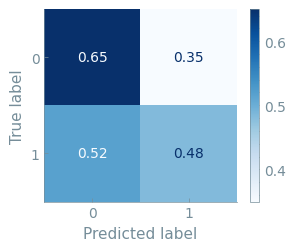

In [74]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_MOFphotocat_confusionMatrix_50_50_size65_RF.pdf', bbox_inches='tight')